# Bill History

This is bills since homeownership.

## Import packages

In [1]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from datetime import datetime

## Load dataset

In [2]:
# Creating the table in dataframe from a csv file
df = pd.read_csv(r'Personal Finance/Bills_v2.csv')

In [3]:
# Summary of the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            101 non-null    object 
 1   Month           101 non-null    int64  
 2   Payment_for     101 non-null    object 
 3   Payment_to      101 non-null    object 
 4   Payment_from    101 non-null    object 
 5   Payment_amount  101 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 4.9+ KB


In [4]:
# Checking for null values
df.isnull().values.any()

False

## Clean/modify data

In [5]:
# Converting the date object mm/dd/yyyy to another date object mm-dd-yyyy
df["Date"] = pd.to_datetime(df["Date"]).dt.date
print(df.dtypes,'\n')

# Previewing the table - just checking the Date columns is properly converted
print(df.head(2))

Date               object
Month               int64
Payment_for        object
Payment_to         object
Payment_from       object
Payment_amount    float64
dtype: object 

         Date  Month        Payment_for Payment_to   Payment_from  \
0  2023-01-01      1     Auto Insurance       USAA  Checking 5868   
1  2023-01-01      1  Renters Insurance       USAA  Checking 5868   

   Payment_amount  
0           74.57  
1            9.23  


In [6]:
# Converting the (amount) string to float
df["Payment_amount"] = df["Payment_amount"].astype(float)
print(df.dtypes,'\n')

# Previewing the table - just checking the Date columns is properly converted
print(df.head(2))

Date               object
Month               int64
Payment_for        object
Payment_to         object
Payment_from       object
Payment_amount    float64
dtype: object 

         Date  Month        Payment_for Payment_to   Payment_from  \
0  2023-01-01      1     Auto Insurance       USAA  Checking 5868   
1  2023-01-01      1  Renters Insurance       USAA  Checking 5868   

   Payment_amount  
0           74.57  
1            9.23  


### High level

In [7]:
# Extremes
Cheap = df['Payment_amount'].min()
Expensive = df['Payment_amount'].max()
Paid = df['Payment_amount'].sum().round(2)

print(f'Most cheap payment:\n $',Cheap,'\n')
print(f'Most expensive payment:\n $',Expensive,'\n')
print(f'Amount paid toward bills thus far:\n $',Paid,'\n')


Most cheap payment:
 $ 1.66 

Most expensive payment:
 $ 1988.87 

Amount paid toward bills thus far:
 $ 29942.61 



In [8]:
# Basic stats by service
print('The amount of money I paid:')
Payment_for_group = df.groupby(['Payment_for']).agg({'Payment_amount': ['min', 'max', 'mean', 'median']}).round(2)
Payment_for_group.columns = ['min', 'max', 'mean', 'median']
Payment_for_group.reset_index()
Payment_for_group

The amount of money I paid:


,min,max,mean,median
Payment_for,,,,
Auto Insurance,74.57,124.17,103.86,100.78
Electricity,1.66,217.97,88.56,85.58
Entertainment,6.50,495.00,61.67,16.96
Home Insurance,1240.61,1272.42,1256.51,1256.51
Mortgage,1988.87,1988.87,1988.87,1988.87
Phone,34.00,227.00,61.12,38.00
Renters Insurance,9.23,10.92,10.36,10.92
Sewer,24.91,154.20,46.39,25.96
Water,20.23,132.71,37.02,21.02


In [9]:
filters = ['Auto Insurance', 'Electricity', 'Sewer', "Water"]
Fluctuating_payments = df.query("Payment_for in @filters")
Fluctuating_payments

,Date,Month,Payment_for,Payment_to,Payment_from,Payment_amount
0,2023-01-01,1,Auto Insurance,USAA,Checking 5868,74.57
2,2023-02-01,2,Auto Insurance,USAA,Checking 5868,88.24
5,2023-03-01,3,Auto Insurance,USAA,Checking 5868,100.78
9,2023-04-01,4,Auto Insurance,USAA,Checking 5868,100.08
11,2023-05-01,5,Auto Insurance,USAA,Checking 5868,95.47
14,2023-05-03,5,Sewer,Drain Dynamo,Checking 5868,36.36
15,2023-05-08,5,Water,Hydro Harmony,Checking 5868,36.69
19,2023-05-31,5,Electricity,Volt Energy Solutions,Checking 5868,1.66
21,2023-05-31,5,Sewer,Drain Dynamo,Checking 5868,38.00
22,2023-06-01,6,Auto Insurance,USAA,Checking 5868,95.47


In [10]:
# Basic stats by service
print('The amount of money I paid:')
Fluctuating_payments_group = Fluctuating_payments.groupby(['Payment_for']).agg({'Payment_amount': ['min', 'max', 'mean', 'median']}).round(2)
Fluctuating_payments_group.columns = ['min', 'max', 'mean', 'median']
Fluctuating_payments_group.reset_index()
Fluctuating_payments_group

The amount of money I paid:


,min,max,mean,median
Payment_for,,,,
Auto Insurance,74.57,124.17,103.86,100.78
Electricity,1.66,217.97,88.56,85.58
Sewer,24.91,154.20,46.39,25.96
Water,20.23,132.71,37.02,21.02


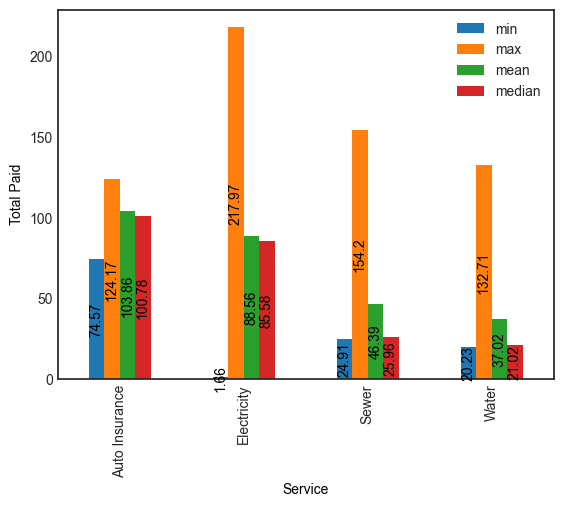

In [11]:
# Stats grouped by payment for viz
matplotlib.style.use('seaborn-v0_8-white') 
ax = Fluctuating_payments_group.plot.bar()
for container in ax.containers:
    ax.bar_label(container, label_type = 'center', rotation = 'vertical', color = 'black', fontsize = 10)

plt.xlabel('Service', size = 10, color = 'black')
plt.ylabel('Total Paid', size = 10, color = 'black')


plt.show()

In [12]:
# Count of pays by service in the last x months
Pay_count = df['Payment_for'].value_counts()
print(Pay_count)

Payment_for
Entertainment        16
Auto Insurance       15
Wifi                 13
Sewer                12
Mortgage             11
Water                11
Electricity          10
Phone                 8
Renters Insurance     3
Home Insurance        2
Name: count, dtype: int64


<Axes: ylabel='count'>

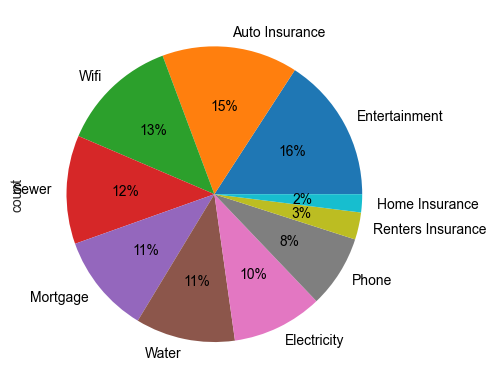

In [13]:
Pay_count.plot(kind = 'pie', y = 'Store', autopct = '%1.0f%%', textprops = {'color':'black'})

### Total

#### Monthly

In [14]:
# Spending per month
Monthly_split_total = df.groupby('Month')['Payment_amount'].sum()
Monthly_split_total

Month
1     2603.60
2     3873.26
3     4235.54
4      148.07
5     2799.91
6     2204.03
7     2330.04
8     2385.60
9     2228.80
10    2311.38
11    2432.94
12    2389.44
Name: Payment_amount, dtype: float64

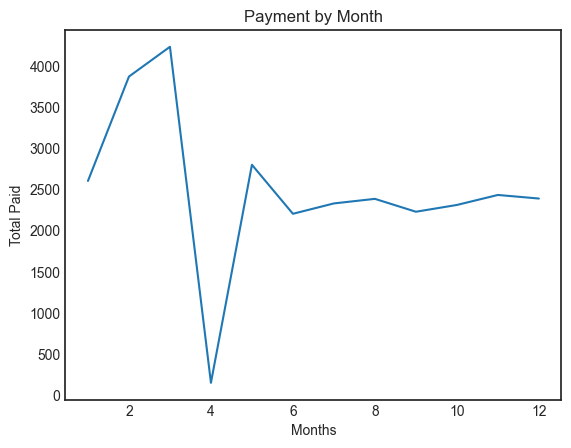

In [15]:
Monthly_split_total.plot(kind = 'line')

plt.title('Payment by Month')
plt.xlabel('Months')
plt.ylabel('Total Paid')

plt.show()

#### Service

In [16]:
# Total Spending by store
Payment_to_split = df.groupby('Payment_to')['Payment_amount'].sum()
Payment_to_split

Payment_to
Climbing                    320.50
Drain Dynamo                556.65
Hydro Harmony               407.23
Netflix                     135.68
Piano                       495.00
Signal Sphere Services      637.89
Stellar Key               21877.57
USAA                       4101.96
Verizon                     489.00
Volt Energy Solutions       885.58
Xbox                         35.55
Name: Payment_amount, dtype: float64

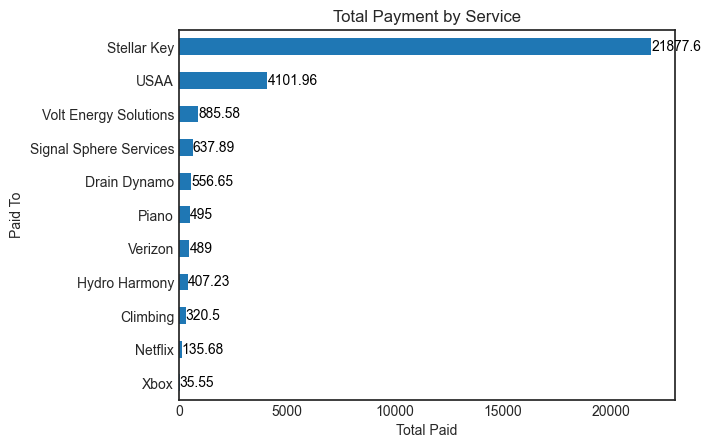

In [17]:
# sort the values in desc order so the barh will be most to least
Store_split = Payment_to_split.sort_values(ascending=True) 
ax = Store_split.plot.barh()
for container in ax.containers:
    #ax.bar_label(container, label_type = 'center', color = 'black', fontsize = 10)
    ax.bar_label(container, color = 'black', fontsize = 10)

plt.title('Total Payment by Service')
plt.xlabel('Total Paid')
plt.ylabel('Paid To')


plt.show()